In [1]:
import pandas as pd

In [43]:
df = pd.read_csv('df_filled.csv')

In [3]:
df.head()

,address,lat,lng,구,년도,업소명,업종명,업태명,영업자시작년도,영업자시작일,폐업년도,폐업일자
0,서울특별시 은평구 신사동 17번지 11호 2층,37.598980,126.910005,은평구,2014.0,2월7일,일반음식점,호프/통닭,2014.0,20140224.0,NaN,NaN
1,서울특별시 은평구 수색동 75번지 DMC 자이상가 1층108호,37.579561,126.898666,은평구,2014.0,오봉도시락,휴게음식점,일반조리판매,2014.0,20141010.0,NaN,NaN
2,서울특별시 은평구 대조동 185번지 16호,37.618575,126.921100,은평구,1999.0,명송회집,일반음식점,분식,2013.0,20130308.0,2013.0,20131220.0
3,"서울특별시 은평구 갈현동 506번지 9호 103,104호",37.616395,126.912951,은평구,2013.0,장충왕족발보쌈,일반음식점,호프/통닭,2013.0,20130808.0,2014.0,20141226.0
4,서울특별시 은평구 응암동 72번지 3호 1층,37.600772,126.929972,은평구,2016.0,예쁜 뽀들이 함바,일반음식점,한식,2016.0,20161129.0,NaN,NaN


In [125]:
def searching(df, area, year=None, status=None):
    df_area = df[df['address'].str.contains(area)]
    if year != None:
        if status == 'opened':
            df_area = df_area.loc[df_area['영업자시작년도'] == year]
        elif status == 'closed':
            df_area = df_area.loc[df_area['폐업년도'] == year]
        elif status == 'on_sale':
            df_area = df_area.loc[(df_area['영업자시작년도'] <= year) & ((df_area['폐업년도'] > year) | df_area['폐업년도'].isnull())]
        else:
            return 'you missed status(opened or closed or on_sale)'
    
    return df_area

In [133]:
yeonnam_2015.shape

(320, 12)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


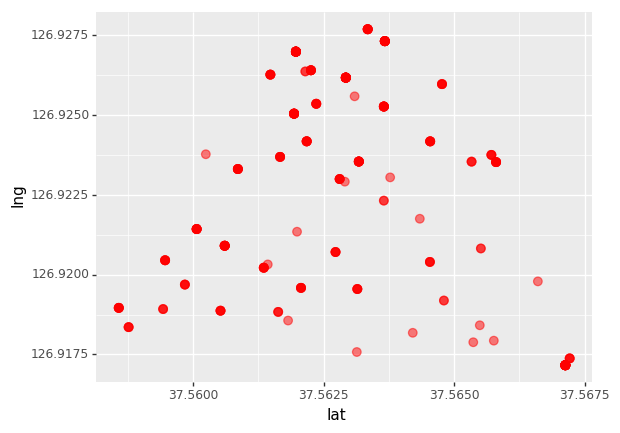

<ggplot: (-9223371913876931391)>

In [132]:
yeonnam_2015 = searching(df, '연남동', year=2015, status='on_sale')

(ggplot(yeonnam_2015[['lat', 'lng']])
 + aes(x='lat', y='lng')
 + geom_point(size=3, alpha=0.5, color='red')
)


In [134]:
sanggae_2015.shape

(1736, 12)

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 24 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


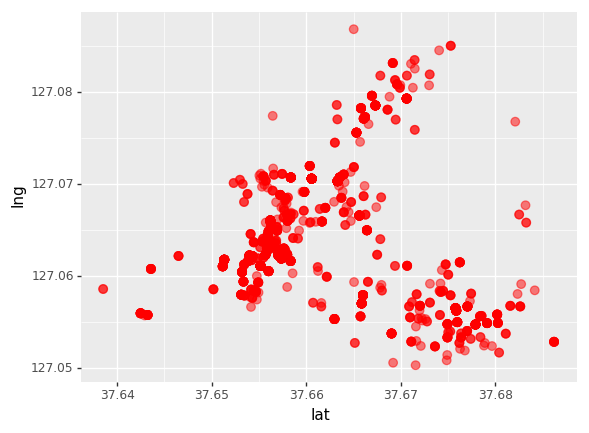

<ggplot: (122977871224)>

In [135]:
sanggae_2015 = searching(df, '상계동', year=2015, status='on_sale')

(ggplot(sanggae_2015[['lat', 'lng']])
 + aes(x='lat', y='lng')
 + geom_point(size=3, alpha=0.5, color='red')
)


In [137]:
df_seoul = df.loc[(df['영업자시작년도'] <= 2015) & ((df['폐업년도'] > 2015) | df['폐업년도'].isnull())]

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 218 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


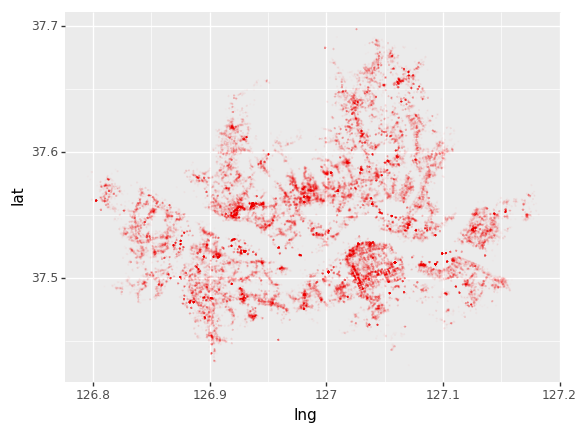

<ggplot: (122977469020)>

In [145]:
(ggplot(df_seoul[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.01, alpha=0.01, color='red')
)

In [194]:
df_seoul_2007 = df.loc[(df['영업자시작년도'] <= 2007) & ((df['폐업년도'] > 2007) | df['폐업년도'].isnull())]
df_seoul_2007.shape, df_seoul_2017.shape

((57427, 12), (148856, 12))

In [208]:
df_jr_2007 = df_seoul_2007.loc[df['구'] == '중랑구']

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


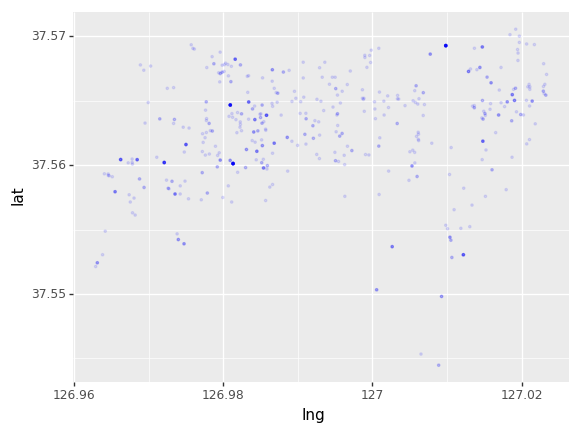

<ggplot: (122977814718)>

In [209]:
(ggplot(df_jr_2007[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.5, alpha=0.1, color='blue')
)

In [167]:
df_seoul_2017 = df.loc[(df['영업자시작년도'] <= 2017) & ((df['폐업년도'] > 2017) | df['폐업년도'].isnull())]

In [210]:
df_jr_2017 = df_seoul_2017.loc[df['구'] == '중랑구']

C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\rlath\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\rlath\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 22 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


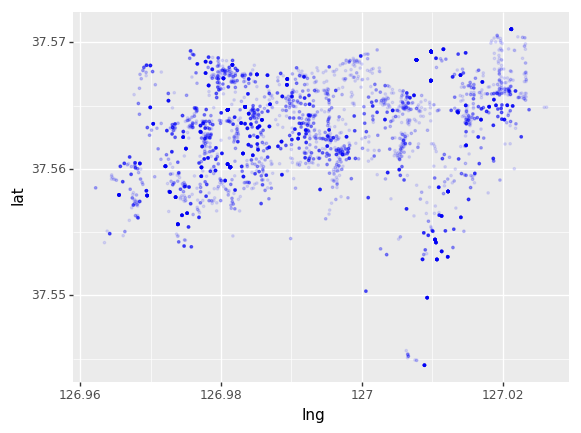

<ggplot: (122978459207)>

In [211]:
(ggplot(df_jr_2017[['lng', 'lat']])
 + aes(x='lng', y='lat')
 + geom_point(size=0.5, alpha=0.1, color='blue')
)

In [91]:
yeonnam_2015 = yeonnam_2015.loc[(yeonnam_2015['영업자시작년도'] == 2015) | (yeonnam_2015['폐업년도'] == 2015) |\
                                ((yeonnam_2015['영업자시작년도'] < 2015) & ((yeonnam_2015['폐업년도'] > 2015)|(yeonnam_2015['폐업년도'].isnull())))]

In [92]:
yeonnam_2015.loc[yeonnam_2015['영업자시작년도'] == 2015, 'color'] = 'yellow'
yeonnam_2015.loc[yeonnam_2015['폐업년도'] == 2015, 'color'] = 'red'
yeonnam_2015.loc[(yeonnam_2015['영업자시작년도'] < 2015) & ((yeonnam_2015['폐업년도'] > 2015)|(yeonnam_2015['폐업년도'].isnull())), 'color'] = 'blue'

In [93]:
yeonnam_2015

,address,lat,lng,구,년도,업소명,업종명,업태명,영업자시작년도,영업자시작일,폐업년도,폐업일자,color
255211,서울특별시 마포구 연남동 561번지 1호,37.561356,126.920216,마포구,2002.0,피자피오,휴게음식점,패스트푸드,2008.0,20080305.0,NaN,NaN,blue
255222,서울특별시 마포구 연남동 226번지 36호,37.563345,126.927686,마포구,1984.0,우성다방,휴게음식점,다방,2002.0,20020118.0,NaN,NaN,blue
255276,서울특별시 마포구 연남동 227번지 6호,37.561970,126.926983,마포구,2014.0,아씨씨(Assisi),일반음식점,한식,2014.0,20140102.0,NaN,NaN,blue
258407,서울특별시 마포구 연남동 224번지 26호 대웅빌딩 1층,37.563672,126.927311,마포구,2008.0,락락,일반음식점,중국식,2009.0,20090916.0,NaN,NaN,blue
258964,서울특별시 마포구 연남동 369번지 6호 1층,37.563146,126.919549,마포구,2004.0,뚜레쥬르,제과점영업,제과점영업,2010.0,20100316.0,NaN,NaN,blue
259226,서울특별시 마포구 연남동 487번지 388호,37.567127,126.917163,마포구,2011.0,아이바바,휴게음식점,일반조리판매,2011.0,20110607.0,NaN,NaN,blue
259266,서울특별시 마포구 연남동 568번지 38호 1층,37.559467,126.920450,마포구,2009.0,돈코보쌈&생고기,일반음식점,한식,2010.0,20100527.0,NaN,NaN,blue
259312,서울특별시 마포구 연남동 224번지 40호 1층 일부,37.563672,126.927311,마포구,2011.0,더커피,휴게음식점,커피숍,2011.0,20110118.0,2017.0,20171214.0,blue
259915,서울특별시 마포구 연남동 570번지 28호 1층,37.558580,126.918959,마포구,2010.0,미니스톱동교한맥점,휴게음식점,편의점,2010.0,20100222.0,2017.0,20170921.0,blue
260109,서울특별시 마포구 연남동 366번지 27호,37.564803,126.919189,마포구,2010.0,다르다,일반음식점,까페,2013.0,20130717.0,NaN,NaN,blue


TypeError: descriptor 'lower' of 'str' object needs an argument

In [102]:
yeonnam_2015['color'].lower()

AttributeError: 'Series' object has no attribute 'lower'

In [88]:
from plotnine import *

In [101]:

(ggplot(yeonnam_2015[['lat', 'lng']])
 + aes(x='lat', y='lng')
 + geom_point(size=3, alpha=0.6, color=yeonnam_2015['color'].lower())
#  + ggtitle('서울시 카페 지도')
)


AttributeError: 'Series' object has no attribute 'lower'